In [1]:
import numpy as np
import swiftestio as swio
import matplotlib.pyplot as plt

In [2]:
inparfile = 'param.swifter.in'
param = swio.read_swifter_param(inparfile)
swifterdat = swio.swifter2xr(param)

Reading Swifter file param.swifter.in


In [3]:
param_file_name = 'param.swiftest.in'
config = swio.read_swiftest_config(param_file_name)
swiftestdat = swio.swiftest2xr(config)

Reading Swiftest file param.swiftest.in


In [4]:
swiftdiff = swiftestdat - swifterdat

In [5]:
swiftdiff = swiftdiff.rename({'time' : 'time (d)'})

In [6]:
swiftdiff['rmag'] = np.sqrt(swiftdiff['px']**2 + swiftdiff['py']**2 + swiftdiff['pz']**2)
swiftdiff['vmag'] = np.sqrt(swiftdiff['vx']**2 + swiftdiff['vy']**2 + swiftdiff['vz']**2)

In [7]:
plidx = swiftdiff.id.values[swiftdiff.id.values < 10]
tpidx = swiftdiff.id.values[swiftdiff.id.values > 10]

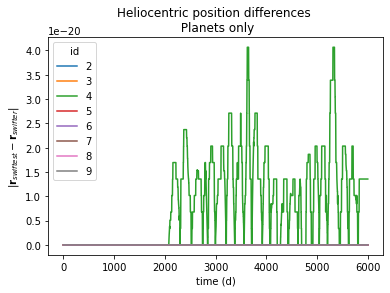

In [8]:
fig, ax = plt.subplots()
swiftdiff['rmag'].sel(id=plidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{r}_{swiftest} - \mathbf{r}_{swifter}|$")
ax.set_title("Heliocentric position differences \n Planets only")
fig.savefig("rmvs_swifter_comparison-mars_ejecta-planets-rmag.png", facecolor='white', transparent=False, dpi=300)

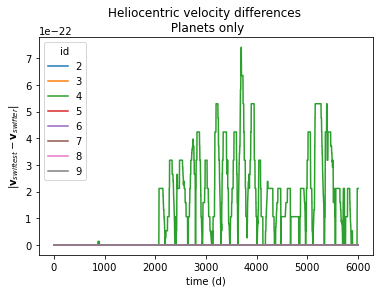

In [9]:
fig, ax = plt.subplots()
swiftdiff['vmag'].sel(id=plidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{v}_{swiftest} - \mathbf{v}_{swifter}|$")
ax.set_title("Heliocentric velocity differences \n Planets only")
fig.savefig("rmvs_swifter_comparison-mars_ejecta-planets-vmag.png", facecolor='white', transparent=False, dpi=300)

No handles with labels found to put in legend.


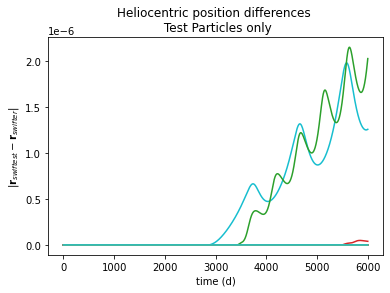

In [14]:
fig, ax = plt.subplots()
swiftdiff['rmag'].sel(id=tpidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{r}_{swiftest} - \mathbf{r}_{swifter}|$")
ax.set_title("Heliocentric position differences \n Test Particles only")
legend = ax.legend()
legend.remove()
fig.savefig("rmvs_swifter_comparison-mars_ejecta-testparticles-rmag.png", facecolor='white', transparent=False, dpi=300)

No handles with labels found to put in legend.


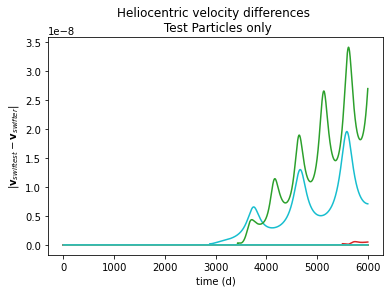

In [15]:
fig, ax = plt.subplots()
swiftdiff['vmag'].sel(id=tpidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{v}_{swiftest} - \mathbf{v}_{swifter}|$")
ax.set_title("Heliocentric velocity differences \n Test Particles only")
legend = ax.legend()
legend.remove()
fig.savefig("rmvs_swifter_comparison-mars_ejecta-testparticles-vmag.png", facecolor='white', transparent=False, dpi=300)